# Import and install all necessary Libraries

In [18]:
from IPython import display
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [1]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql

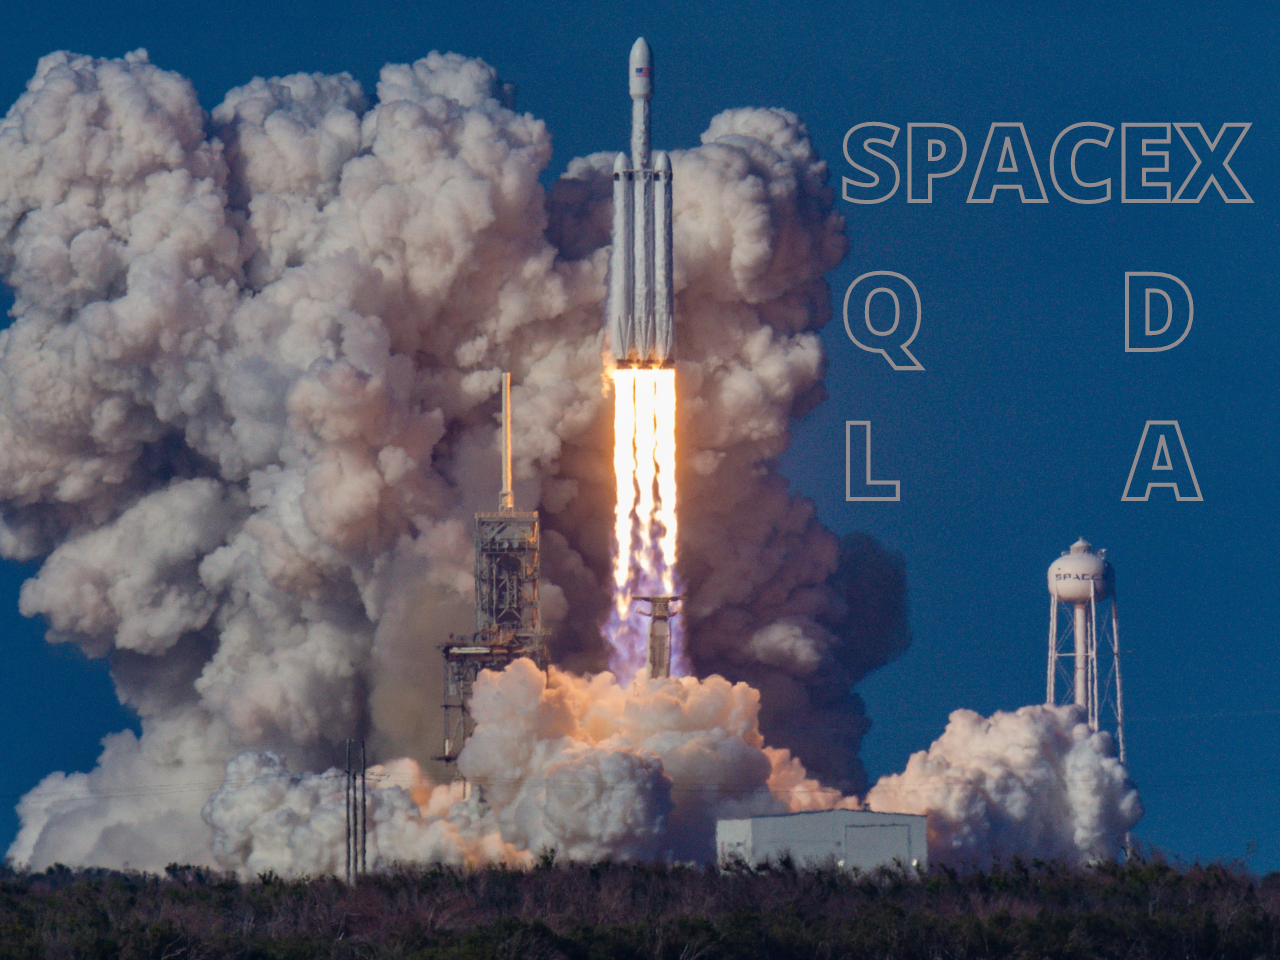

In [4]:
display.Image("work-6.jpg")

### Store the dataset in database table


<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload.png">

1.  Change the Date Format by manually typing DD-MM-YYYY and timestamp format as DD-MM-YYYY HH\:MM:SS.


2.  Change the PAYLOAD_MASS\_\_KG\_  datatype  to INTEGER.

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload2.png">


### Connect to the database

I have excluded the cell where I connected to my IBM DB2 instance for security purposes. However, with the Cell below, we are able to start using SQL queries in our cells.

In [2]:
%load_ext sql

## To get a better understanding of the mission, we need to understand how many launch sites were utilised.

##### The cell below will display the names of the unique launch sites  in the space mission


In [4]:
%%sql
SELECT DISTINCT launch_site
FROM SPACEXTBL
;

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40
KSC LC-39A
VAFB SLC-4E


### Task 2

##### Display 5 records where launch sites begin with the string 'CCA'


In [5]:
%%sql
SELECT * 
FROM SPACEXTBL
WHERE LAUNCH_SITE LIKE '%CCA%'
LIMIT 5

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


DATE,time__utc_,booster_version,launch_site,payload,payload_mass__kg_,orbit,customer,mission_outcome,landing__outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3

##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [6]:
%%sql
SELECT sum(PAYLOAD_MASS__KG_) 
FROM SPACEXTBL 
WHERE CUSTOMER LIKE 'NASA (CRS)'

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


1
45596


### Task 4

##### Display average payload mass carried by booster version F9 v1.1


In [7]:
%%sql
SELECT avg(PAYLOAD_MASS__KG_) 
FROM SPACEXTBL 
WHERE Booster_Version LIKE  'F9 v1.1%'

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


1
2534


### Task 5

##### List the date when the first successful landing outcome in ground pad was acheived.

*Hint:Use min function*


In [8]:
%%sql
SELECT min(Date) 
FROM SPACEXTBL 
WHERE LANDING__OUTCOME LIKE  'Success (ground pad)'

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


1
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [9]:
%%sql
SELECT Booster_Version 
FROM SPACEXTBL 
WHERE Landing__Outcome LIKE 'Success (drone ship)' AND  PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


booster_version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7

##### List the total number of successful and failure mission outcomes


In [10]:
%%sql
SELECT Mission_Outcome, count(Mission_Outcome) 
FROM SPACEXTBL 
GROUP by Mission_Outcome


 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


mission_outcome,2
Failure (in flight),1
Success,99
Success (payload status unclear),1


### Task 8

##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [11]:
%%sql
SELECT Booster_Version, PAYLOAD_MASS__KG_ 
FROM SPACEXTBL 
WHERE PAYLOAD_MASS__KG_ = (select max(PAYLOAD_MASS__KG_) from SPACEXTBL)

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


booster_version,payload_mass__kg_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


### Task 9

##### List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015


In [12]:
%%sql
SELECT Landing__Outcome, Booster_Version, Launch_Site, Date
FROM SPACEXTBL 
WHERE Landing__Outcome LIKE 'Failure (drone ship)' AND Date LIKE '2015-%'

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


landing__outcome,booster_version,launch_site,DATE
Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40,2015-01-10
Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40,2015-04-14


### Task 10

##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order


In [13]:
%%sql
SELECT Landing__Outcome
FROM SPACEXTBL
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP by Landing__Outcome 
ORDER BY Landing__Outcome DESC

 * ibm_db_sa://nht13924:***@21fecfd8-47b7-4937-840d-d791d0218660.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31864/bludb
Done.


landing__outcome
Uncontrolled (ocean)
Success (ground pad)
Success (drone ship)
Precluded (drone ship)
No attempt
Failure (parachute)
Failure (drone ship)
Controlled (ocean)


In [8]:
spacex = pd.read_csv('Spacex.csv')
spacex.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
0,04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,22-05-2012,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,08-10-2012,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


<module 'matplotlib' from '/home/benjamin/miniconda3/lib/python3.9/site-packages/matplotlib/__init__.py'>

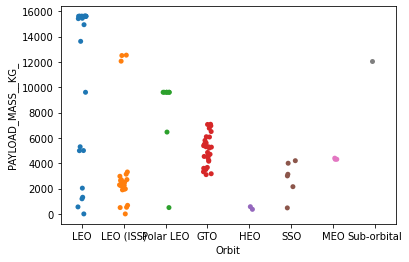

In [20]:
sns.stripplot(x="Orbit" ,y="PAYLOAD_MASS__KG_" ,data=spacex)
plt